### Exploratory data analysis

In [19]:
import pickle
from train_test_split import get_training_portion_of_the_data
import pandas as pd
import numpy as np

# import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import calmap
import seaborn as sns
%matplotlib inline

CATEGORY_COLUMN_NAME = "category"

### Getting data from pickle files dumped in notebook 1

In [14]:
with open("random_reviews.p","rb") as f:
    random_reviews = pickle.load( f )

with open("bow1000.p","rb") as f:
    bow1000 = pickle.load( f )

In [11]:
# Obtaining train set as requested in project brief - 800 first lines as the training set
random_reviews_EDA = get_training_portion_of_the_data(random_reviews)
bow1000_EDA = get_training_portion_of_the_data(bow1000) 

returns 800 lines in total 1000 out of lines (portion 0.8)
returns 800 lines in total 1000 out of lines (portion 0.8)


## Visualizing review date distribution with calender heatmap

(<Figure size 1296x1440 with 14 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016121A519B0>,
       dtype=object))

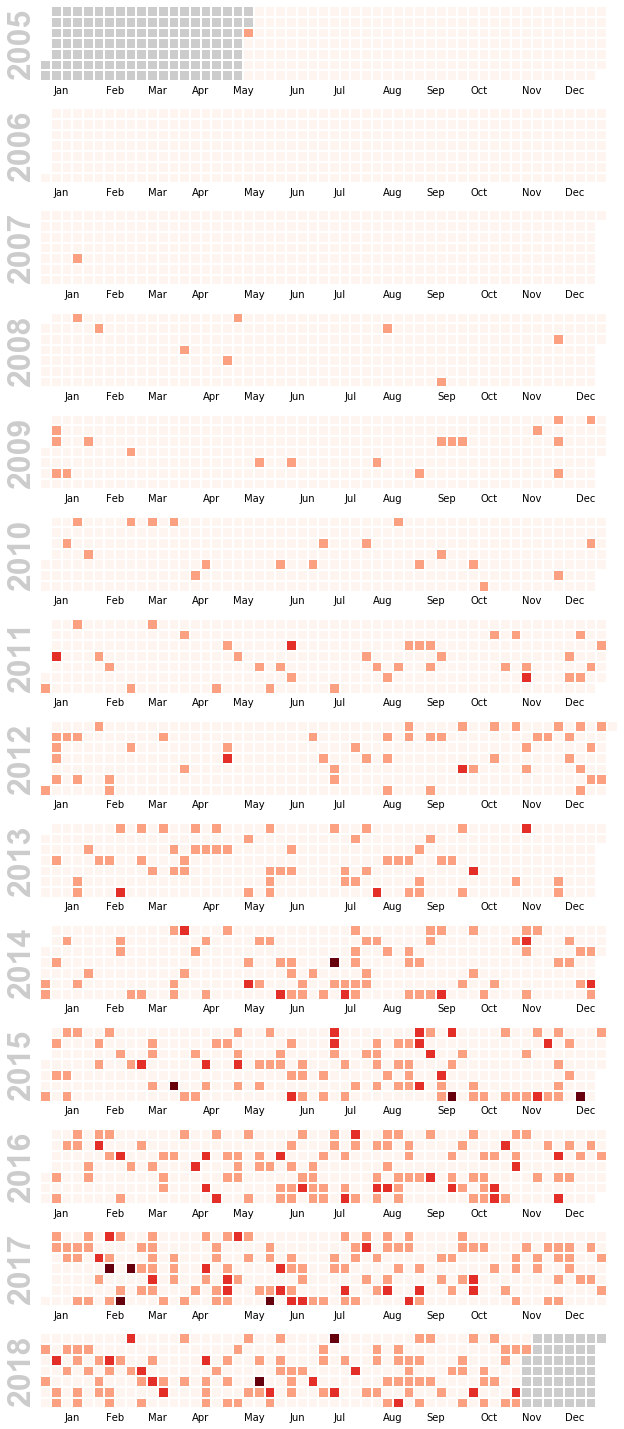

In [16]:
tempDf = pd.DataFrame()
tempDf['datetime'] = pd.to_datetime(random_reviews_EDA["date"])
tempDf.index = tempDf['datetime']
# A column of ones to tempDf
tempDf['count'] = np.ones(len(tempDf))
# Aggregating to date level
tempDf = tempDf.resample('d').sum()
calmap.calendarplot(tempDf["count"], fig_kws=dict(figsize=(18, 20)), fillcolor='#cccccc',daylabels='')


### Visualize the distribution of the star ratings.
Is there a bias or an imbalance in the distribution?

In [20]:
total_count = len(random_reviews_EDA[CATEGORY_COLUMN_NAME])
good = np.array(sum(random_reviews_EDA[CATEGORY_COLUMN_NAME]==1)/total_count)
poor = np.array(sum(random_reviews_EDA[CATEGORY_COLUMN_NAME]==0)/total_count)

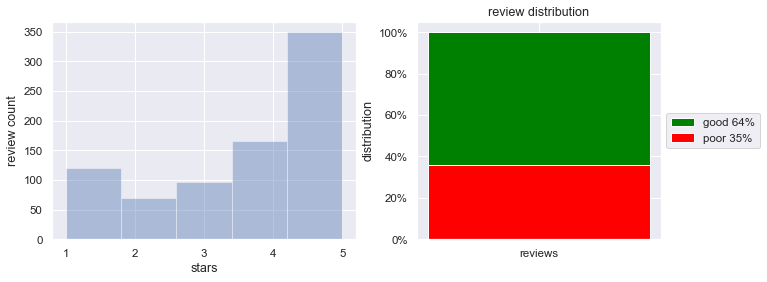

In [46]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 4))

# First generating histogram
ax1.set_ylabel("review count")
sns.distplot(random_reviews_EDA["stars"], bins = 5, ax= ax1, kde = False)

# Second generating stacked bar chart
sets = ['reviews']
ind = [x for x, _ in enumerate(sets)]
sns.set(font_scale=1.05)
plt.bar(ind, good, width=0.2, label='good {}%'.format(int(good*100)), color='green', bottom=poor)
plt.bar(ind, poor, width=0.2, label='poor {}%'.format(int(poor*100)), color='red')

plt.xticks(ind, sets)
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax2.set_ylabel("distribution")
ax2.set_title("review distribution")

# Shrink current axis by 20%
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Generate the pairs plots and observe correlation between features and feature-labels.

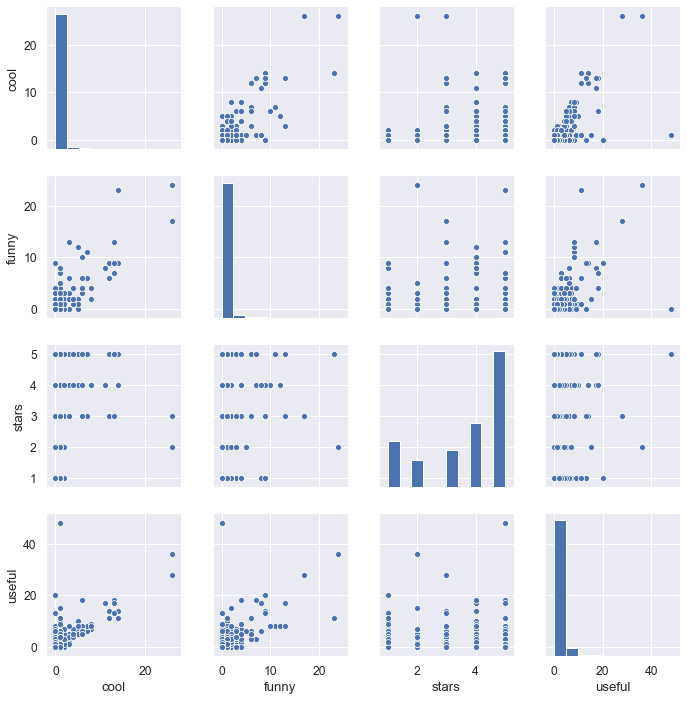

In [47]:
sns.set(font_scale=1.1)
g = sns.pairplot(random_reviews_EDA.drop("category", axis=1))

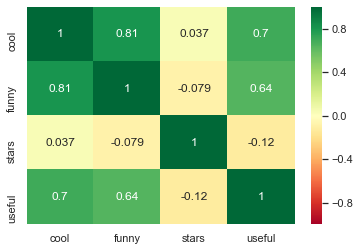

In [49]:
corr = random_reviews_EDA.drop("category", axis=1).corr()

f, ax = plt.subplots() #figsize=(9, 6)
sns.set(font_scale=1)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdYlGn', center=0, vmin=-1, vmax=1, annot=True, ax=ax)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

## Unique businesses and reviewers in reviews

Number of unique businesses 783


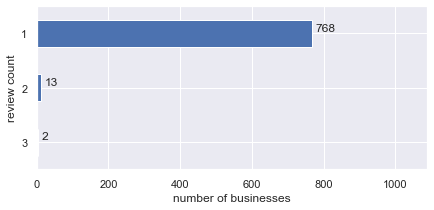

Number of unique users 799


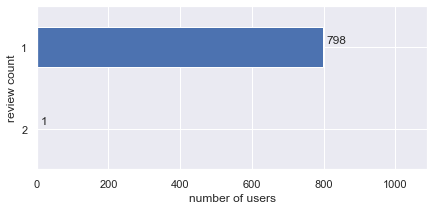

In [30]:
pivot1 = random_reviews_EDA.groupby('business_id')['date'].nunique().reset_index(name='review count')
pivot1.sort_values(ascending=False, by="review count")
print("Number of unique businesses {}".format(len(pivot1)))

# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 3))

pivot2 = pivot1.groupby('review count')['business_id'].nunique().reset_index(name='number of businesses')
ax1 = pivot2.plot.barh(x='review count', y='number of businesses', legend=False, figsize=(7,3),)
ax1.set_xlabel("number of businesses")
for i, each in enumerate(pivot2.index):
    y = pivot2.iloc[each][1]
    ax1.text(y+10, i-0.05, y)
ax1.set_xlim(0,1090)
ax1.invert_yaxis()
plt.show()

random_reviews_EDA.index.name = 'id'
pivot1 = random_reviews_EDA.groupby('user_id')['date'].nunique().reset_index(name='review count')
pivot1.sort_values(ascending=False, by="review count")
print("Number of unique users {}".format(len(pivot1)))

pivot2 = pivot1.groupby('review count')['user_id'].nunique().reset_index(name='number of users')
ax2 = pivot2.plot.barh(x='review count', y='number of users',  legend=False, figsize=(7,3), ) # figsize=(7,3),
ax2.set_xlabel("number of users")
ax2.set_xlim(0,1090)
for i, each in enumerate(pivot2.index):
    y = pivot2.iloc[each][1]
    ax2.text(y+10, i-0.05, y)
ax2.invert_yaxis()
plt.show()

### Korrelaatiomatriisi histogrammina

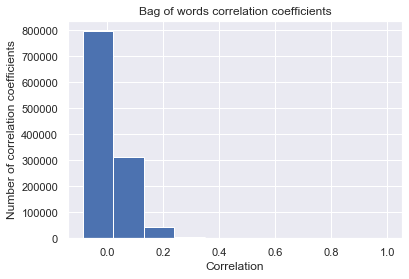

In [44]:
# plt.hist(np.array(corr).flatten(order='C'),bins=10)
# ax.set_xlabel("number of users")
corr = bow1000_EDA.corr()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Correlation')
ax.set_ylabel('Number of correlation coefficients')
ax.set_title('Bag of words correlation coefficients')
ax.hist(np.array(corr).flatten(order='C'),bins=10)

plt.show()

In [35]:
np.histogram(corr)

(array([796930, 314082,  45198,   6782,   1518,    474,    194,     80,
            48,   1094], dtype=int64),
 array([-0.08791653,  0.02087513,  0.12966678,  0.23845843,  0.34725008,
         0.45604174,  0.56483339,  0.67362504,  0.78241669,  0.89120835,
         1.        ]))

### Class distributions for review usefulness

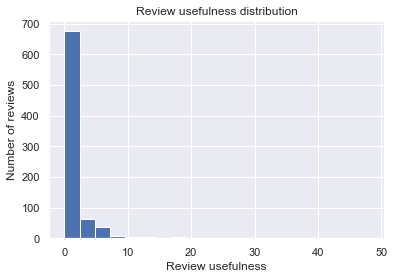

In [36]:
# plt.hist(np.array(corr).flatten(order='C'),bins=10)
# ax.set_xlabel("number of users")

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Review usefulness')
ax.set_ylabel('Number of reviews')
ax.set_title('Review usefulness distribution')
ax.hist(random_reviews_EDA['useful'],bins=20)

plt.show()

### Correlation between good/bad and BoW

In [37]:
bow1000_EDA.head()

able  absolutely  accommodating  across  actually  add  added  additional  \
0     0           0              0       0         0    0      0           0   
1     0           0              0       0         0    0      0           0   
2     0           0              0       0         0    0      0           0   
3     0           0              0       0         1    0      0           0   
4     0           0              0       0         0    0      0           0   

   advice  afternoon  ...  writing  wrong  year  years  yelp  yes  yet  young  \
0       0          0  ...        0      0     0      0     0    0    0      0   
1       0          0  ...        0      0     0      0     0    0    0      0   
2       0          0  ...        0      0     0      0     0    0    0      0   
3       0          0  ...        0      0     0      0     0    0    0      0   
4       0          0  ...        0      0     0      1     0    0    0      0   

   yum  yummy  
0    0      0  
1    0      0  
2    0      0  
3    0      0  
4    0      0  

[5 rows x 1080 columns]

In [38]:
correlations_good_bad_Bow = []

# TODO: fix what is being analysed here. Should be BOW compared to good/bad reviews

for column in bow1000_EDA.columns:
  coef = np.corrcoef(x=random_reviews_EDA['category'],y=bow1000_EDA[column])[0,1]
  correlations_good_bad_Bow.append(coef)

In [39]:
np.array(correlations_good_bad_Bow).size

1080

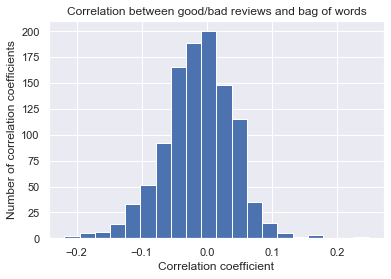

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Correlation coefficient')
ax.set_ylabel('Number of correlation coefficients')
ax.set_title('Correlation between good/bad reviews and bag of words')
ax.hist(correlations_good_bad_Bow,bins=20)

plt.show()

### Correlation between usefulness and BoW

In [41]:
# TODO: fix what is being analysed here. Should be BOW compared to usefulness of

correlations_usefulness_Bow = []

for column in bow1000_EDA.columns:
  coef = np.corrcoef(x=random_reviews_EDA['useful'],y=bow1000_EDA[column])[0,1]
  correlations_usefulness_Bow.append(coef)

In [42]:
np.array(correlations_usefulness_Bow).size

1080

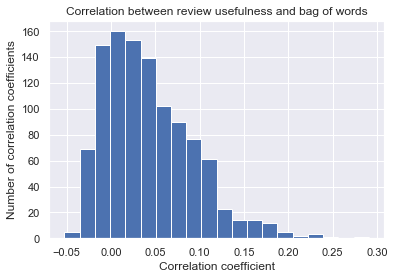

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Correlation coefficient')
ax.set_ylabel('Number of correlation coefficients')
ax.set_title('Correlation between review usefulness and bag of words')
ax.hist(correlations_usefulness_Bow,bins=20)

plt.show()